In [31]:
import pandas as pd

In [32]:
diff_csv = pd.read_csv('diffData.csv')

In [33]:
diff_csv

,Sno,time,distance,Diffusion
0,1,456.441718,0.006426,Dgb
1,2,598.773006,0.000728,Db
2,3,181.595092,0.000401,Db
3,4,265.030675,0.000484,Db
4,5,476.073620,0.006563,Dgb
...,...,...,...,...
975,976,149.693252,0.003680,Dgb
976,977,488.343558,0.000657,Db
977,978,354.601227,0.000560,Db
978,979,112.883436,0.003196,Dgb


<h1>Problem 1</h1>

In [34]:
diff_csv_bulk = diff_csv[diff_csv['Diffusion']=="Db"]
diff_csv_grain = diff_csv[diff_csv['Diffusion']=="Dgb"]

Split the csv into two dataframes, for bulk and grain boundary diffusion

In [35]:
diff_csv_bulk

,Sno,time,distance,Diffusion
1,2,598.773006,0.000728,Db
2,3,181.595092,0.000401,Db
3,4,265.030675,0.000484,Db
8,9,320.245399,0.000532,Db
9,10,166.871166,0.000384,Db
...,...,...,...,...
969,970,392.638037,0.000589,Db
970,971,44.171779,0.000198,Db
971,972,541.104295,0.000692,Db
976,977,488.343558,0.000657,Db


In [36]:
diff_csv_grain

,Sno,time,distance,Diffusion
0,1,456.441718,0.006426,Dgb
4,5,476.073620,0.006563,Dgb
5,6,392.638037,0.005960,Dgb
6,7,80.981595,0.002707,Dgb
7,8,255.214724,0.004805,Dgb
...,...,...,...,...
973,974,272.392638,0.004964,Dgb
974,975,235.582822,0.004617,Dgb
975,976,149.693252,0.003680,Dgb
978,979,112.883436,0.003196,Dgb


In [37]:
x2_bulk = (diff_csv_bulk['distance'])**2
t_bulk = diff_csv_bulk['time']
x2_grain = (diff_csv_grain['distance'])**2
t_grain = diff_csv_grain['time']

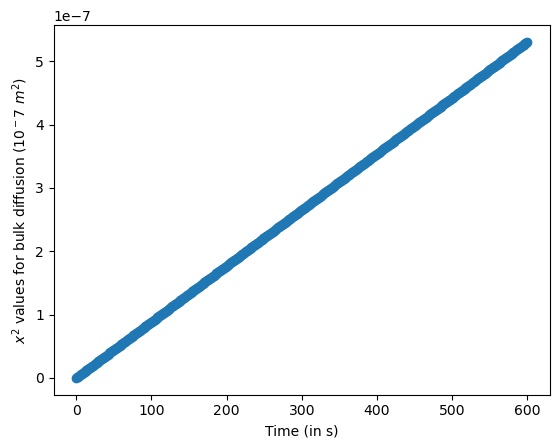

In [52]:
import matplotlib.pyplot as plt
plt.xlabel('Time (in s)')
plt.ylabel('$x^2$ values for bulk diffusion ($10^-7$ $m^2$)')
plt.scatter(t_bulk, x2_bulk)
plt.show()

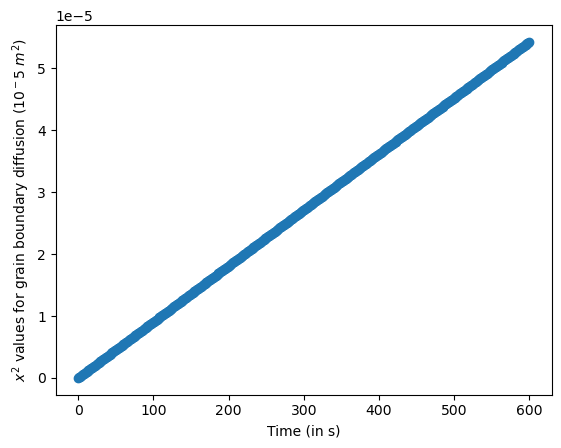

In [53]:
plt.xlabel('Time (in s)')
plt.ylabel('$x^2$ values for grain boundary diffusion ($10^-5$ $m^2$)')
plt.scatter(t_grain, x2_grain)
plt.show()

In [40]:
import numpy as np

In [41]:
t_bulk_arr = np.array(t_bulk).reshape(-1,1)

Making it a 2D array 

In [42]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(t_bulk_arr,x2_bulk)

LinearRegression()

In [43]:
bulk_diffusivity_val = reg.coef_

In [44]:
t_grain_arr = np.array(t_grain).reshape(-1,1)

In [45]:
reg1 = LinearRegression()
reg1.fit(t_grain_arr,x2_grain)

LinearRegression()

In [46]:
grain_boundary_diffusivity_val = reg1.coef_

In [47]:
print("Bulk Diffusivity value:",bulk_diffusivity_val[0],"\nGrain Boundary Diffusivity value:",grain_boundary_diffusivity_val[0])

Bulk Diffusivity value: 8.842843416123299e-10 
Grain Boundary Diffusivity value: 9.047575360698303e-08


<h1>Problem 2</h1>

In [70]:
input_data = pd.concat([diff_csv['distance'],diff_csv['time']],axis=1)
target = diff_csv['Diffusion']

Defining input and target data 

In [71]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(input_data,target)

LogisticRegression()

In [72]:
pred_val = logreg.predict(input_data)

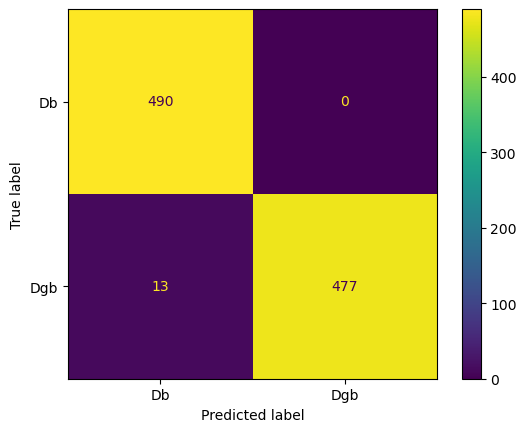

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
ConfusionMatrixDisplay.from_predictions(target,pred_val)

In [77]:
print(classification_report(target,pred_val))

              precision    recall  f1-score   support

          Db       0.97      1.00      0.99       490
         Dgb       1.00      0.97      0.99       490

    accuracy                           0.99       980
   macro avg       0.99      0.99      0.99       980
weighted avg       0.99      0.99      0.99       980



Now scaling data

In [78]:
input_data = (input_data - input_data.mean(axis=0))/input_data.std(axis=0)

In [79]:
input_data

,distance,time
0,1.469974,0.900915
1,-0.776442,1.720571
2,-0.905320,-0.681869
3,-0.872450,-0.201381
4,1.523879,1.013971
...,...,...
975,0.387448,-0.865585
976,-0.804240,1.084631
977,-0.842545,0.314437
978,0.196515,-1.077565


In [80]:
logreg1 = LogisticRegression()
logreg1.fit(input_data,target)

LogisticRegression()

In [81]:
pred_val_new = logreg1.predict(input_data)

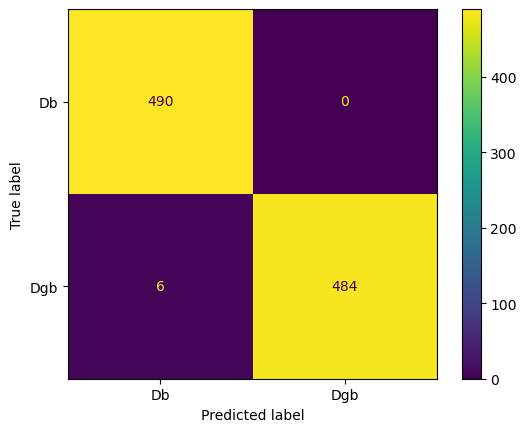

In [82]:
ConfusionMatrixDisplay.from_predictions(target,pred_val_new)

In [83]:
print(classification_report(target,pred_val_new))

              precision    recall  f1-score   support

          Db       0.99      1.00      0.99       490
         Dgb       1.00      0.99      0.99       490

    accuracy                           0.99       980
   macro avg       0.99      0.99      0.99       980
weighted avg       0.99      0.99      0.99       980



The overall precision and recall have improved and the number of wrong predictions has reduced, meaning scaling has an impact on the accuracy of the model.